In this part we have a classification problem. From the source:

"Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams."

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Check the data file
!head ../data/ex2data1.txt

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1
45.08327747668339,56.3163717815305,0
61.10666453684766,96.51142588489624,1
75.02474556738889,46.55401354116538,1
76.09878670226257,87.42056971926803,1
84.43281996120035,43.53339331072109,1


In [3]:
#Import the data and add the titles
data = pd.read_csv('../data/ex2data1.txt', sep=",", header=None, names=['Exam1', 'Exam2', 'Admission'])
data.head()

,Exam1,Exam2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


ExamX indicates the grade from Exam X. Admission is a binary value, 1 indicating that a student is admitted.

In [4]:
data.describe()

,Exam1,Exam2,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


I will import seaborn library again for the style

In [5]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set()

Let's visualize this data. Our dependent value (ie explained value) is a binary value. We will use colors to indicate its value. X and Y axis will be used for continuous values of exam results.

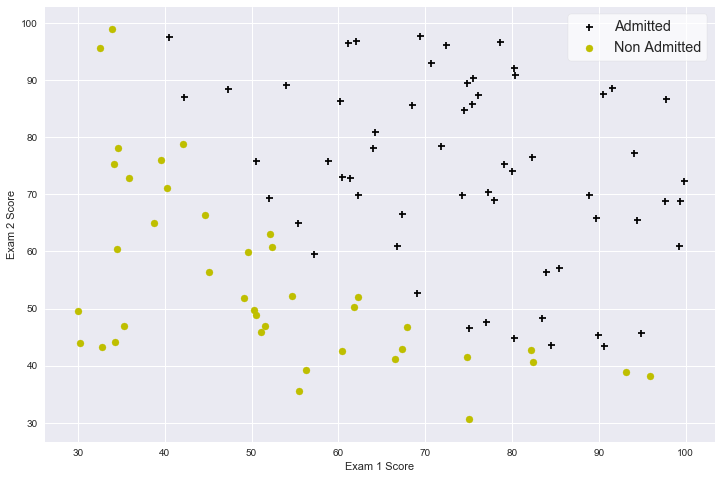

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

#First scatter the people who were addmitted
ax.scatter(data[data["Admission"] == 1]["Exam1"], data[data["Admission"] == 1]["Exam2"], 
           c='k', marker='+', label='Admitted')

#Now the Non-Admitted Folks
ax.scatter(data[data["Admission"] == 0]["Exam1"], data[data["Admission"] == 0]["Exam2"],
          c='y', marker='o', label="Non Admitted")

ax.legend(frameon = True, fontsize="large", facecolor = "White", framealpha = 0.7)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score');

What we have here is more or less a linear border between classes. There is some curvature as well but a linear seperator will do the job

**Warm up Exercise**

We should write the Sigmoid function.

$h_\theta(x) = g(\theta^{T}x)$

and $g$ is the sigmoid function. It is defined as:

$g(z) = \frac{1}{1 + e ^ {-z}}$

In [199]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

sigmoid(0) =  0.5


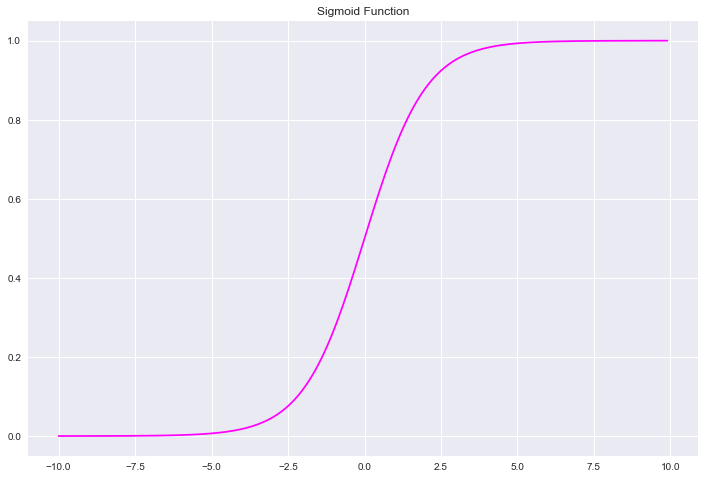

In [200]:
#Let's draw this graph:
interval = np.arange(-10, 10, 0.1)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(interval, sigmoid(interval), c='magenta')
ax.set_title("Sigmoid Function");

#Also print the value for sigmoid(0). It should be 0.5:
print('sigmoid(0) = ',sigmoid(0))
del(interval)

**Cost function and gradient**

This is the cost function for Logistic Regression. 

![alt text](eq1.png "Cost Function")

Since I was too lazy to write it down in Markdown language, I imported the image of equation. The code for importing is 

$\text{![alt text](eq1.png "Cost Function")}$  

(without the outer quotation marks). I will start with defining the hypothesis function $h_{\theta}(X)$, afterwards I will define the cost function. 


In [174]:
#This time I will first define the hypothesis function
def h(theta, X):
    return sigmoid(np.dot(X, theta))

#Now the cost function
def cost_function(theta, X, y):
    """
    This is a cost function that returns the cost of theta given X and y
    X is an n x k matrix of explanatory variables
    y is a n x 1 matrix of explained variables
    theta is a k x 1 matrix of multipliers for linear function
    """
    
    item1 = - y * np.log(h(theta, X))
    item2 = -(1 - y) * np.log(1 - h(theta, X))
    return np.sum(item1 + item2) / (X.shape[0])

Let's take a break from functions and go back to our data. We should convert our pandas items to numpy elements. 

First I will add a column of ones. Then I will make ones as the first column of data and seperate explanatory variables from explained variable. Finally I will convert the pandas dataframe to numpy matrices.

In [10]:
ones = np.ones(data['Exam1'].shape[0])
data['ones'] = ones
del(ones) #remove unused items
data.head()

,Exam1,Exam2,Admission,ones
0,34.623660,78.024693,0,1.0
1,30.286711,43.894998,0,1.0
2,35.847409,72.902198,0,1.0
3,60.182599,86.308552,1,1.0
4,79.032736,75.344376,1,1.0


In [11]:
cols = list(data.columns)
cols = cols[-1:] + cols[:-1]
data = data[cols]
#del(cols)
data.head()

,ones,Exam1,Exam2,Admission
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [12]:
X = data[cols[:-1]]
y = data[cols[-1:]]
print(X.head(3))
print(y.head(3))
#We seperated explanatory and explained values

   ones      Exam1      Exam2
0   1.0  34.623660  78.024693
1   1.0  30.286711  43.894998
2   1.0  35.847409  72.902198
   Admission
0          0
1          0
2          0


In [13]:
X = np.asarray(X.values)
y = np.asarray(y.values)
#check the dimensions
X.shape, y.shape

((100, 3), (100, 1))

A note on the above cell. I have used np.matrix before. Now I am using np.asarray. Matrix in Numpy causes weird behaviors. For example X * y has elementwise multiplication as arrays. But it is equivalent to np.dot(X, y) or X@y. But this creates inconsistent behaviour. I have used matrix in previous solutions but I will stick to arrays from now on.

Finally let's define a theta value and check the cost value for it. My theta values are arrays of shape (k, 1) where k is the number of explanatory variables (number of columns of X). From the instructions: "You should see that the cost is about 0.693."

In [175]:
theta = np.zeros((X.shape[1],1))

cost_function(theta, X, y)

0.69314718055994529

Now we'll define gradient function. Scipy's optimization libraries usually don't necessiate defining a gradient function. But let's go ahead and define the gradient function correction function using the following equations. 

Note: The first function is the gradient function. Second one is the function that updates our theta value.

$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{n} \sum\limits_{i=1}^n (h_{\theta}(x^{i}) - y^i)x_j^i$

$\theta_{j}^{\text{new}} = \theta_{j}^{\text{old}}  - \alpha \frac{\partial J(\theta^{\text{old}})}{\partial \theta_{j}}$

In [182]:
def gradient(theta, X, y):
    """
    This function will take in theta value and calculate the gradient 
    descent values.
    X is an n x k matrix of explanatory variables
    y is a n x 1 matrix of explained variables
    theta is a k x 1 matrix of multipliers for linear function
    """
    errors = h(theta, X) - y
    #errors will be calculated more than once, so let's do it once and store it
    correction = np.sum(errors * X, axis=0) * (1.0 / X.shape[0])
    return correction.reshape((X.shape[1], 1))

def gradient_update(theta, X, y, alpha=0.01):
    """
    This function will take in theta value and update it to a new one 
    according to gradient descent for logistic regression function.
    X is an n x k matrix of explanatory variables
    y is a n x 1 matrix of explained variables
    theta is a k x 1 matrix of multipliers for linear function
    alpha is the size of the step for updating new theta values
    """
    grad = gradient(theta, X, y)
    return theta - alpha * grad


Unfortunately scipy's optimization libraries failed to produce a result for me. I will use the good old method of optimization I have used previously. 

In [246]:
iterations = 3000000
alpha = 0.0014
theta = np.zeros((X.shape[1],1))
cost_values = np.empty(int(iterations/1000))
theta_values = np.empty((int(iterations/1000), theta_1.shape[0], 1))

for i in range(iterations):
    theta = gradient_update(theta, X, y, alpha)
    if (i % 1000) == 0:
        cost_values[int(i/1000)] = cost_function(theta, X, y)
        theta_values[int(i/1000), :, :] = theta
    
    
print(theta)
print(cost_function(theta,X, y))

[[-22.50611711]
 [  0.18500323]
 [  0.17998084]]
0.204650265225


This method is really in efficient. Especially for loop makes it extremely slow. On top of it, you should keep an eye on the alpha variable. Even an alpha variable of 0.0015 makes the optimization unstable. You must really draw the cost vs iteration graph to make sure your iteration is going smoothly. It should not jump around. On top of it, we needed an extremely high number of iterations to reach the optimal number.

I could not get scipy's optimization functions to work properly with my current code because they need to work with 1D arrays. My theta objects are always 2D. I will rewrite my cost function and gradient function to make it suitable with scipy. Excuse the way I leave things the way they are because I don't want to only present the best solutions I have, I want to document my mistakes when I am figuring things out. It seems like the biggest hurdle with numerical computing on Python is the dimensions of arrays. Who could guess it? 

Finally excuse my inelegant way of saving memory for cost_values and theta values.

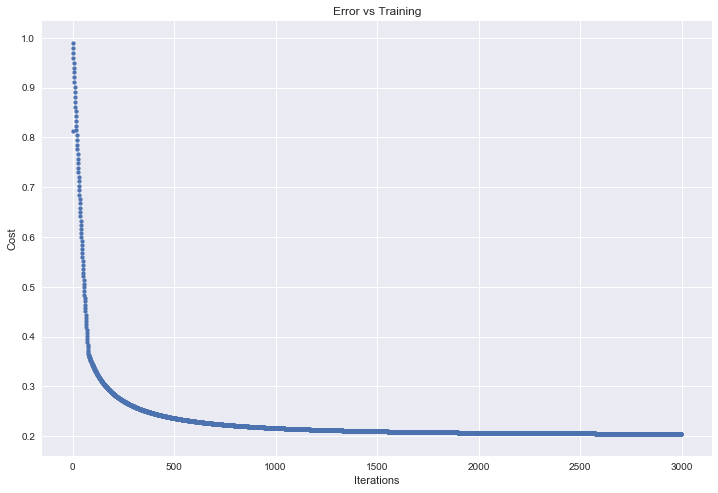

In [268]:
theta_sol1 = theta.copy()
#Just want to save the theta value we found since I will reset theta later
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(np.arange(0, iterations/1000), cost_values, s = 15)
ax.set(xlabel = 'Iterations', ylabel = 'Cost',
      title = 'Error vs Training');

Back to the drawing board and let's flatten thetas. My cost function does not play well with flattened thetas. The part where y is multiplied with np.log... is the part that created the problems. y must be flattened:

In [344]:
def h(theta, X):
    return sigmoid(np.dot(X, theta))

#Now the cost function
def cost_function(theta, X, y):
    """
    This is a cost function that returns the cost of theta given X and y
    X is an n x k matrix of explanatory variables
    y is a n x 1 matrix of explained variables
    theta is a vector with k elements of multipliers for linear function
    """
    
    item1 = - y.flatten() * np.log(h(theta, X))
    item2 = -(1 - y.flatten()) * np.log(1 - h(theta, X))
    return np.sum(item1 + item2) / (X.shape[0])

Similar problem here. y does not play with flattened theta values.
Note to myself: It would be much easier to force the dimensions for theta within the function first, then proceed.

In [359]:
def gradient(theta, X, y):
    """
    This function will take in theta value and calculate the gradient 
    descent values.
    X is an n x k matrix of explanatory variables
    y is a n x 1 matrix of explained variables
    theta is a vector with k elements of multipliers for linear function
    """
    errors = h(theta, X) - y.flatten()
    #errors will be calculated more than once, so let's do it once and store it
    correction = np.sum(errors.reshape((X.shape[0], 1)) * X, axis=0) * (1.0 / X.shape[0])
    return correction

Finally we can apply our optimization algorithm. We'll import scipy. There is an algorithm in scipy that uses gradient information as well.

In [375]:
import scipy.optimize as opt  

theta = np.zeros(X.shape[1])
result = opt.minimize(fun=cost_function, method='TNC', 
                      jac=gradient, x0=theta, args=(X,y), options={'maxiter':400})

result

     fun: 0.20349770158947517
     jac: array([  9.11884479e-09,   9.74363717e-08,   4.76377099e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131849,   0.20623159,   0.20147148])

This just looks beautiful and it is far much more efficient :) It only took 17 iterations to find the result! I used 3 million loops before, and I was not able to optimize as good as this one.

"After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776."

In [381]:
theta = result['x']
x_trial = np.array([1.0, 45.0, 85.0])
h(theta, x_trial)

0.77629062151050376

Let's visualize the results.

Decision boundary happens when $\theta * X = 0$. We will define two points and draw a line between them. 

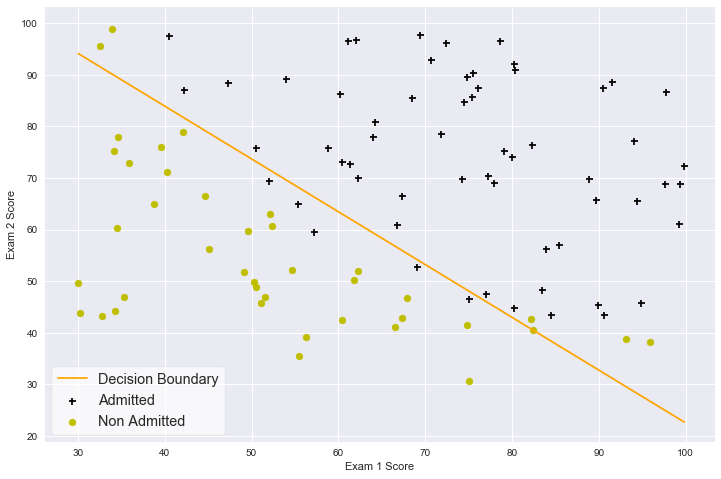

In [389]:
x_p = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_p = (-1.0 / theta[2]) * (theta[0] + theta[1] * x_p)

fig, ax = plt.subplots(figsize=(12, 8))

#First scatter the people who were addmitted
ax.scatter(data[data["Admission"] == 1]["Exam1"], data[data["Admission"] == 1]["Exam2"], 
           c='k', marker='+', label='Admitted')

#Now the Non-Admitted Folks
ax.scatter(data[data["Admission"] == 0]["Exam1"], data[data["Admission"] == 0]["Exam2"],
          c='y', marker='o', label="Non Admitted")

#We need to draw the seperating line between Admitted and Non-Admitted
ax.plot(x_p, y_p, c='orange', label='Decision Boundary')

ax.legend(frameon = True, fontsize="large", facecolor = "White", framealpha = 0.7)
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score');

Let's check the accuracy rate of our prediction function. We can count the misclassified items from the graph, but why should we do it if we can write a function to do it for us:

In [398]:
def prediction_function(theta, X):
    return h(theta, X) >= 0.5

total_corrects = np.sum((y.flatten() == prediction_function(theta, X)))
total_dpoints = X.shape[0]

accuracy_rate = total_corrects/total_dpoints
accuracy_rate

0.89000000000000001

We have 89% accuracy rate. Not bad.